# Spotify Database Analysis
by Brenden BALANE

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt

We have here a database of almost 230000 tracks from Spotify. Our aim in this project is to be able to predict the popularity of a song based on different features (genre, accousticness, danceability, liveness, loudness, mode, energy, valence, time_signature, duration, key, speechiness, instrumentalness, tempo)

Dataset link : https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db

In [2]:
df = pd.read_csv("SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Data Cleaning

The 'track_id' column in not needed for us, so we'll remove it.

In [3]:
to_drop = ['track_id']
df.drop(to_drop, inplace=True, axis=1) #remove 'track_id' column because we don't need it

In [4]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


By checking the data, we found that some tracks were there several times. For example, the track '7 rings' by Ariana Grande was 2 two times in the dataframe. Why ? Because it had several genres. The track had a row with the genre 'Dance', and another one with genre "Pop". So wee decided to drop duplicates of a same track.

In [5]:
df=df.drop_duplicates(subset=['track_name'], keep='first') #remove duplicates of songs

In [6]:
df[df['track_name'] == '7 rings'] #check that we removed duplicates

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,100,0.578,0.725,178640,0.321,0.0,C#,0.0884,-10.744,Minor,0.323,70.142,4/4,0.319


In [7]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

We have a fully cleaned dataframe as we don't have null values

# Data Analysis

Text(0, 0.5, 'Count')

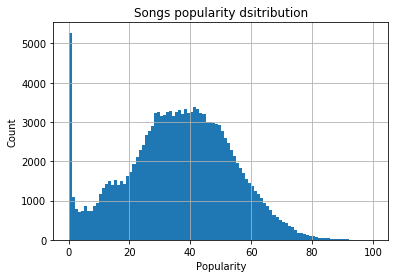

In [8]:
df['popularity'].hist(bins=100)
plt.title('Songs popularity dsitribution')
plt.xlabel('Popularity')
plt.ylabel('Count')

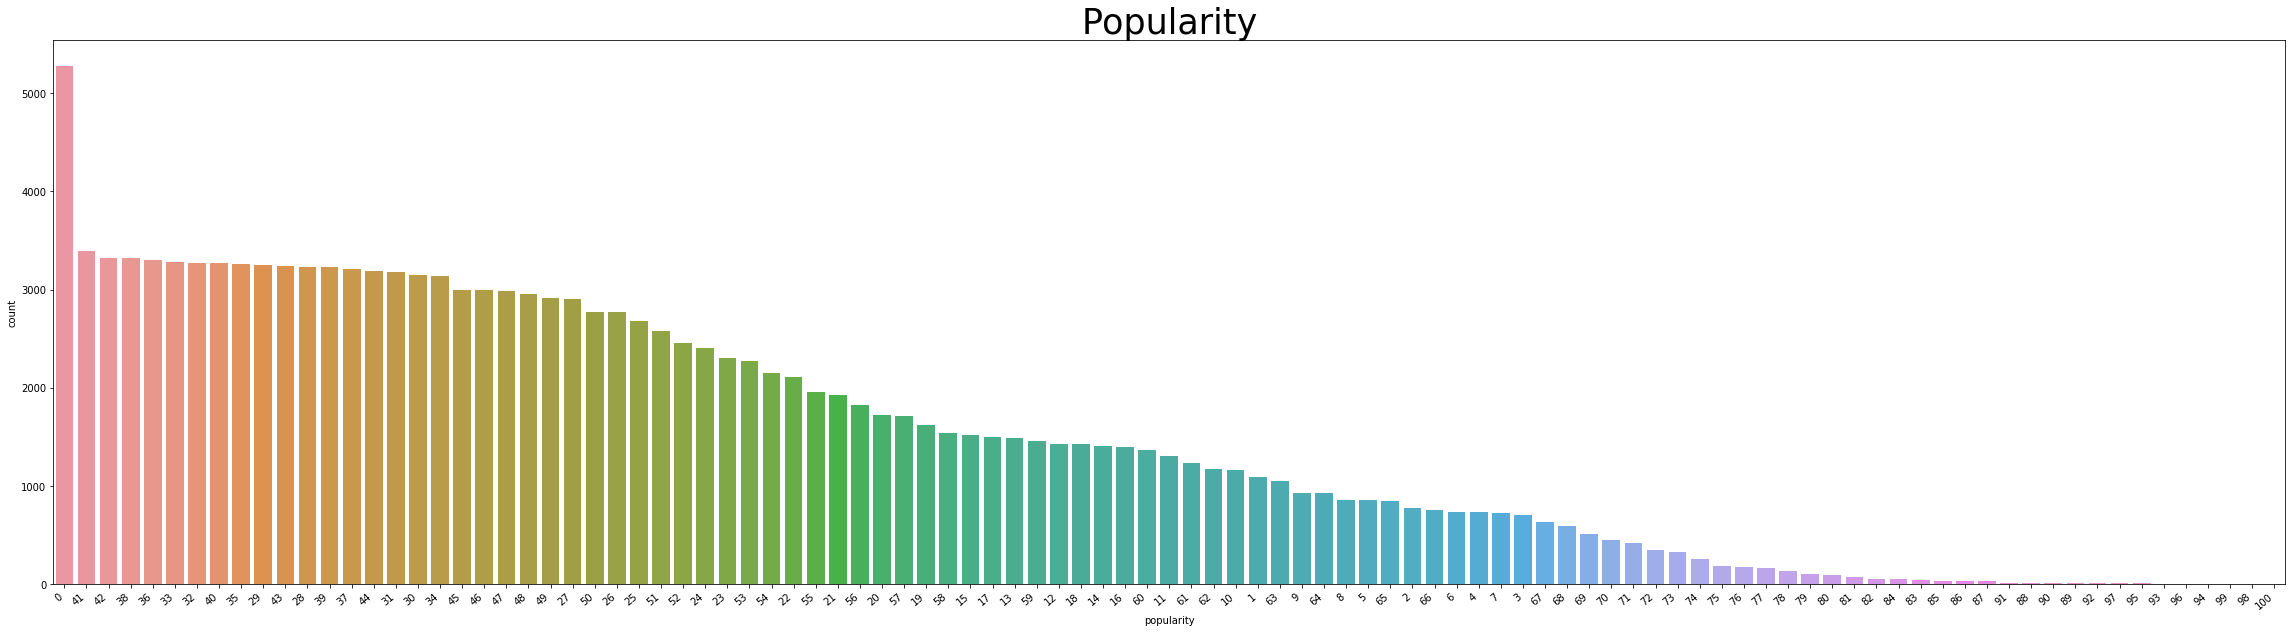

In [9]:
plt.figure(figsize=(40,10))
ax = sns.countplot(x='popularity', data=df, order= df['popularity'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.title("Popularity",fontsize=35,color="Black")
plt.show()

We plotted here the popularity count distribution

We see a lot of songs have popularity 0. And majority have a popularity between 25 and 55. Only a few get past a popularity of 70

In [10]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,148615.000000,148615.000000,148615.000000,1.486150e+05,148615.000000,148615.000000,148615.000000,148615.000000,148615.000000,148615.000000,148615.000000
mean,35.686034,0.415104,0.535602,2.380231e+05,0.552323,0.181838,0.228818,-10.381584,0.130517,116.927421,0.448572
std,17.413903,0.371008,0.192927,1.368838e+05,0.280933,0.330268,0.215277,6.618389,0.209590,31.378762,0.269817
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,24.000000,0.047400,0.406000,1.773800e+05,0.330000,0.000000,0.097750,-13.302000,0.037100,91.837000,0.215000
50%,36.000000,0.305000,0.553000,2.200000e+05,0.589000,0.000089,0.131000,-8.323000,0.049600,114.887000,0.437000
75%,48.000000,0.810000,0.680000,2.708670e+05,0.791000,0.130000,0.284000,-5.659000,0.103000,138.277500,0.666000
max,100.000000,0.996000,0.987000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


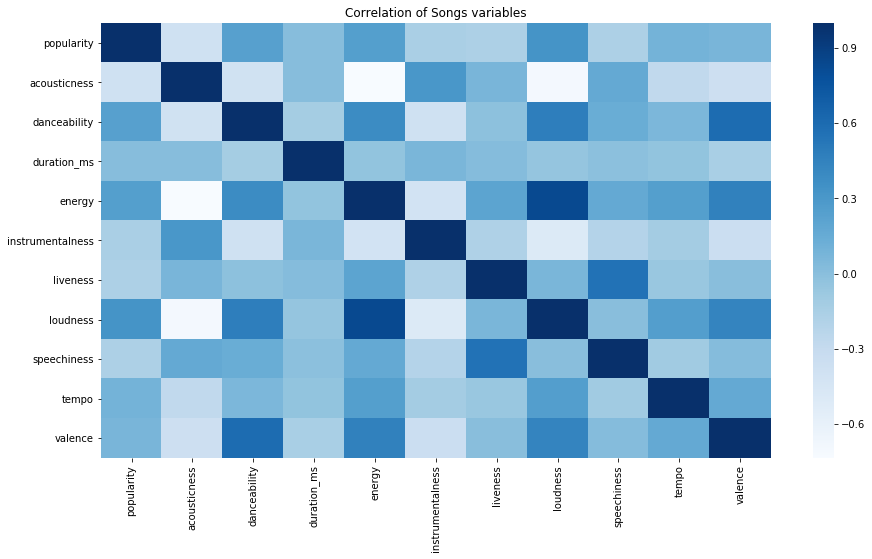

In [11]:
plt.subplots(figsize=(15,8))
ax = plt.axes()
ax.set_title("Correlation of Songs variables")

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Blues")

plt.show()

In [12]:
df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.380348,0.239781,0.012498,0.253779,-0.148563,-0.159590,0.333163,-0.160021,0.092042,0.071658
acousticness,-0.380348,1.000000,-0.395964,0.015324,-0.735753,0.311673,0.077566,-0.699958,0.170978,-0.269548,-0.361745
danceability,0.239781,-0.395964,1.000000,-0.124673,0.389247,-0.382389,-0.016994,0.478197,0.141618,0.059903,0.598334
duration_ms,0.012498,0.015324,-0.124673,1.000000,-0.033577,0.070034,0.023528,-0.044666,-0.009572,-0.032934,-0.145370
energy,0.253779,-0.735753,0.389247,-0.033577,1.000000,-0.404384,0.213341,0.831505,0.166578,0.248815,0.461916
instrumentalness,-0.148563,0.311673,-0.382389,0.070034,-0.404384,1.000000,-0.174612,-0.504237,-0.202029,-0.114066,-0.342748
liveness,-0.159590,0.077566,-0.016994,0.023528,0.213341,-0.174612,1.000000,0.065303,0.557909,-0.063524,0.010059
loudness,0.333163,-0.699958,0.478197,-0.044666,0.831505,-0.504237,0.065303,1.000000,0.009433,0.254848,0.441851
speechiness,-0.160021,0.170978,0.141618,-0.009572,0.166578,-0.202029,0.557909,0.009433,1.000000,-0.104548,0.023305
tempo,0.092042,-0.269548,0.059903,-0.032934,0.248815,-0.114066,-0.063524,0.254848,-0.104548,1.000000,0.167963


After plotting the correlation matrix, there are no significant correlations with popularity. Danceability, energy, and loudness have slight correlations with popularity though

Text(0.5, 1.0, 'Popularity according to duration')

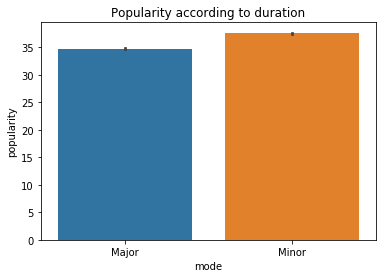

In [13]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity according to duration')

Text(0.5, 1.0, 'Popularity according to key')

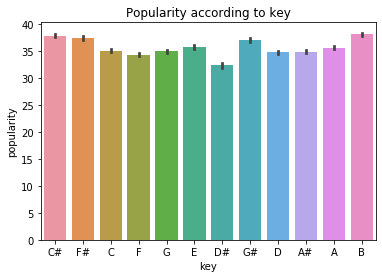

In [14]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity according to key')

We plotted the popularity in order to key or mode. Seeing the average popularity, we see that features key and mode do not have a significant influence on average popularity

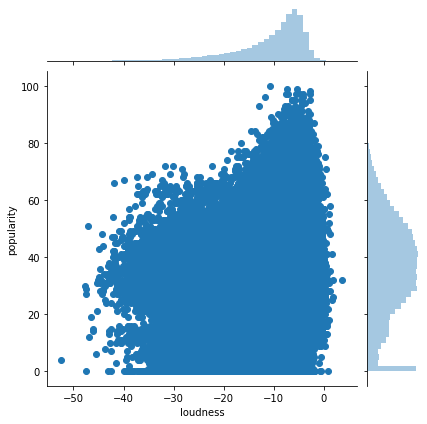

In [15]:
sns.jointplot(x = 'loudness', y = 'popularity', data = df)

After plotting popularity in function of loudness, we see that even though we see all kind of popularity for all kind of loudness, we see that tracks may have chances to have a popularity > than 60 only if loudness is big (near 0)

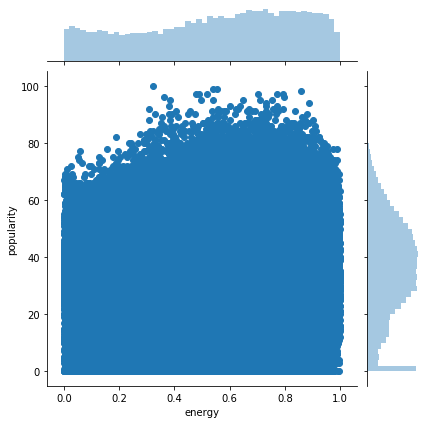

In [16]:
sns.jointplot(x = 'energy', y = 'popularity', data = df)

After plotting popularity in function of energy, we cannot conclude a lot. We only see that a energy score > 0,25 will perhaps lead you to a popularity near 100

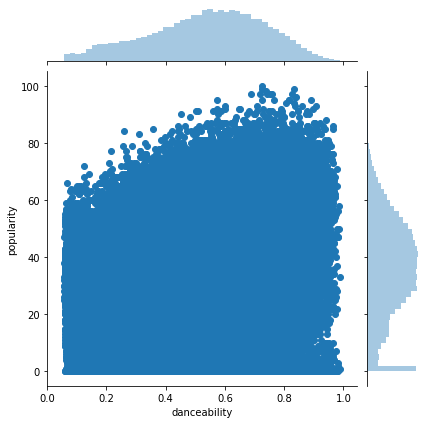

In [17]:
sns.jointplot(x = 'danceability', y = 'popularity', data = df)

After plotting popularity in function of danceability, we see that even though we see all kind of popularity for all kind of danceability, we oberve a rise in popularity as we rise the danceability factor. We see that tracks may have chances to have a popularity > than 60 only if danceability is big (near 1)

In [18]:
df2 = df.copy() #we copy the dataframe

In [19]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


We consider now all the tracks with popularity >= 60 as popular and tracks <60 as non-popular

In [20]:

df2.loc[df2['popularity'] < 60, 'popularity'] = 0 
df2.loc[df2['popularity'] >= 60, 'popularity'] = 1
df2.sample(10)


,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
187000,Ska,Strike Anywhere,Instinct,0,0.00349,0.338,162413,0.956,0.000003,D,0.1980,-3.877,Major,0.0803,97.370,4/4,0.6590
144604,Indie,Will Joseph Cook,Daisy Chains,0,0.01630,0.744,231268,0.716,0.000000,B,0.1010,-4.708,Minor,0.0278,134.001,4/4,0.4350
181800,Movie,Justin Hurwitz,"Planetarium - From ""La La Land"" Soundtrack",1,0.92000,0.248,257280,0.142,0.733000,G,0.5480,-15.443,Major,0.0379,128.841,4/4,0.0439
13267,Alternative,Royal Tusk,Aftermath,0,0.00166,0.437,209109,0.934,0.000000,F#,0.3170,-3.227,Minor,0.0915,144.135,4/4,0.4310
7523,Country,Randy Travis,Sweet By and By,0,0.25000,0.500,147000,0.555,0.000000,C,0.5320,-9.132,Major,0.0279,106.203,4/4,0.7450
131928,Reggae,Buju Banton,Wicked Dickie,0,0.17400,0.772,237200,0.918,0.000000,C#,0.3140,-5.186,Major,0.0820,91.622,4/4,0.7890
79249,Children’s Music,half•alive,Tip Toes,0,0.04190,0.679,195001,0.801,0.000005,F,0.1100,-5.598,Major,0.1630,130.035,4/4,0.5170
16046,Dance,5 Seconds of Summer,Meet You There,1,0.00985,0.728,190855,0.711,0.000003,F#,0.2540,-5.047,Minor,0.0701,132.915,4/4,0.6930
180753,Jazz,Greyboy,Grey's Groove (feat. Karl Denson),0,0.26500,0.697,320027,0.796,0.060700,D#,0.1460,-7.389,Major,0.0434,108.008,4/4,0.5510
5290,Alternative,System Of A Down,Attack,0,0.00511,0.349,186467,0.970,0.000003,F#,0.0433,-2.874,Major,0.0892,159.785,4/4,0.2990


In [21]:
df2[df2['popularity'] == 1]

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,1,0.08300,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930
136,R&B,Rihanna,Desperado,1,0.32300,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,1,0.06750,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,1,0.36000,0.563,240597,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,4/4,0.7680
139,R&B,Olivia O'Brien,Love Myself,1,0.59600,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660
140,R&B,ELHAE,Needs,1,0.66100,0.510,205640,0.331,0.000000,B,0.1230,-13.073,Minor,0.0895,124.657,4/4,0.2250
141,R&B,Nao,Make It Out Alive (feat. SiR),1,0.66700,0.670,239147,0.649,0.000130,C,0.1090,-7.426,Minor,0.0875,147.935,4/4,0.6180
142,R&B,Frank Ocean,Seigfried,1,0.97500,0.377,334570,0.255,0.000208,E,0.1020,-11.165,Minor,0.0387,125.004,5/4,0.3700
143,R&B,Layton Greene,Roll In Peace,1,0.72000,0.523,170343,0.507,0.000000,G,0.0774,-6.448,Minor,0.2250,140.368,4/4,0.7000
144,R&B,Usher,You Make Me Wanna...,1,0.03590,0.761,219120,0.639,0.000000,F,0.0945,-7.577,Minor,0.0539,164.088,4/4,0.9220


In [22]:
popular_songs = df2[df2.popularity == 1]
not_popular_songs = df2[df2.popularity == 0]

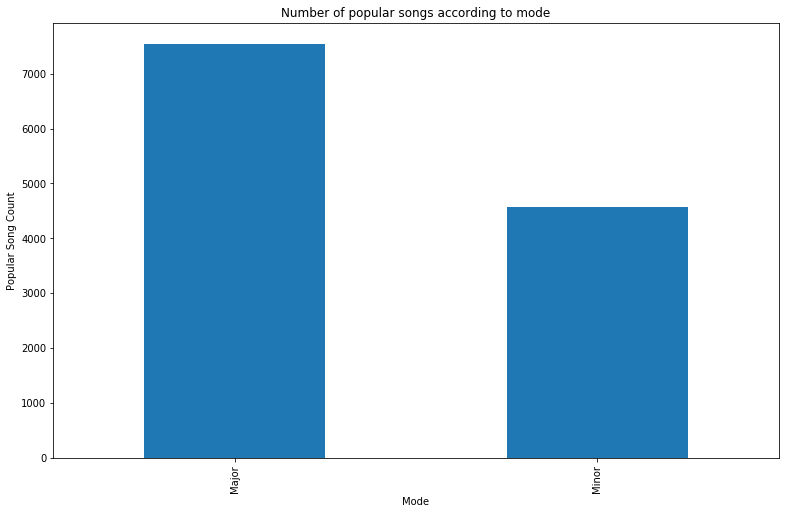

In [23]:
plt.subplots(figsize=(13,8))
popular_songs.groupby('mode')['popularity'].sum().plot(kind = 'bar')
plt.title('Number of popular songs according to mode')
plt.xlabel('Mode')
plt.ylabel('Popular Song Count')
plt.show()

We see that there are almost 2 times more popular songs in Major mode that in Minor mode

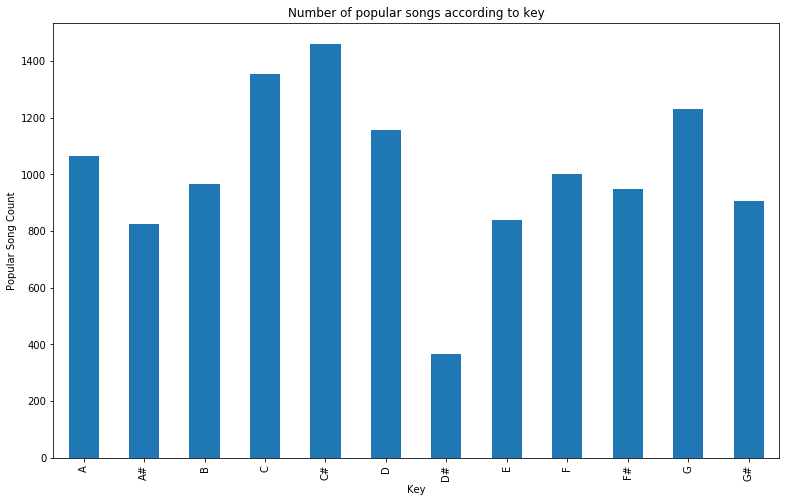

In [24]:
plt.subplots(figsize=(13,8))
popular_songs.groupby('key')['popularity'].sum().plot(kind = 'bar')
plt.title('Number of popular songs according to key')
plt.xlabel('Key')
plt.ylabel('Popular Song Count')
plt.show()

For the influence of the key on popular songs, we see that it's pretty homogeneous. Even though, we see a peak for the C# key. We see also that when all others keys have pretty similar amount of popular songs, the D# key has a too small amount of popular songs

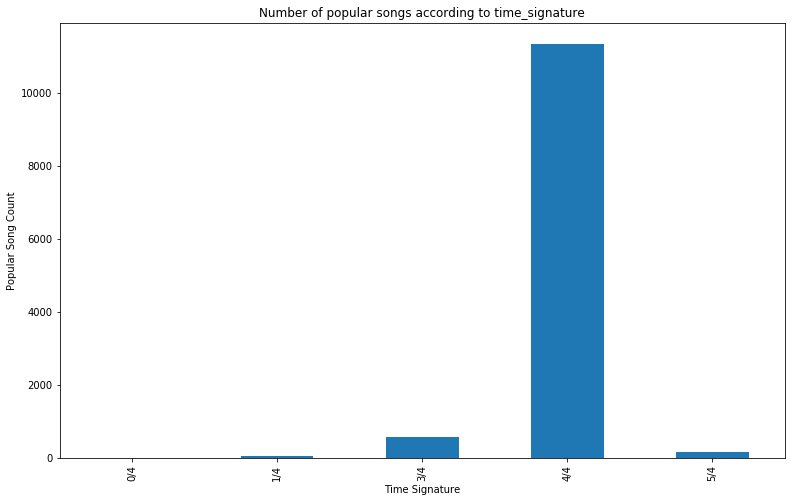

In [25]:
plt.subplots(figsize=(13,8))
popular_songs.groupby('time_signature')['popularity'].sum().plot(kind = 'bar')
plt.title('Number of popular songs according to time_signature')
plt.xlabel('Time Signature')
plt.ylabel('Popular Song Count')
plt.show()

We see here clearly that the time signature 4/4 stands out from the others, when we talk about popular songs

We will now plot the count of popularity in function of differernt characteristics (loudness, danceability, energy)

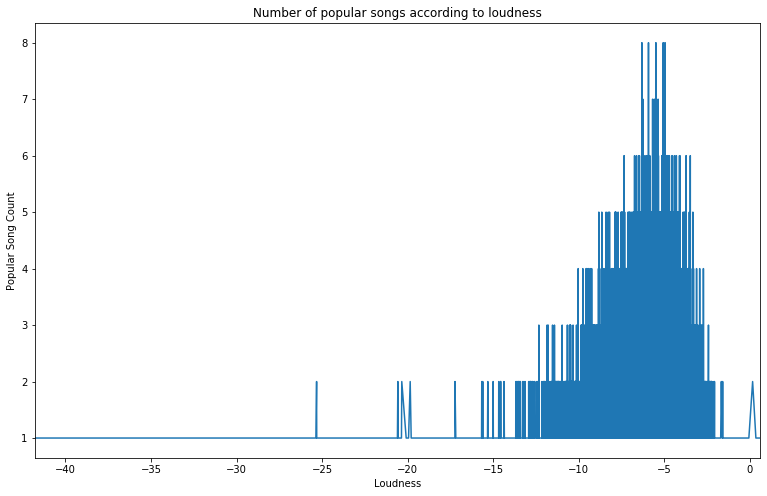

In [26]:
plt.subplots(figsize=(13,8))
popular_songs.groupby('loudness')['popularity'].count().plot()

plt.title('Number of popular songs according to loudness')
plt.xlabel('Loudness')
plt.ylabel('Popular Song Count')
plt.show()

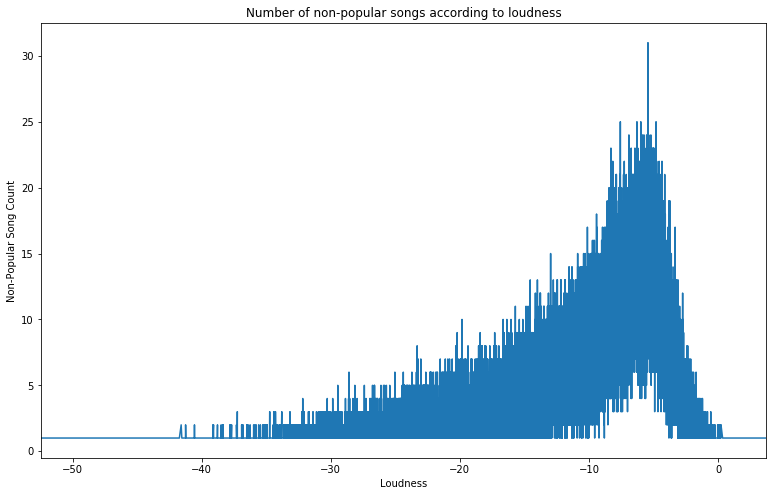

In [27]:
plt.subplots(figsize=(13,8))
not_popular_songs.groupby('loudness')['popularity'].count().plot()

plt.title('Number of non-popular songs according to loudness')
plt.xlabel('Loudness')
plt.ylabel('Non-Popular Song Count')
plt.show()

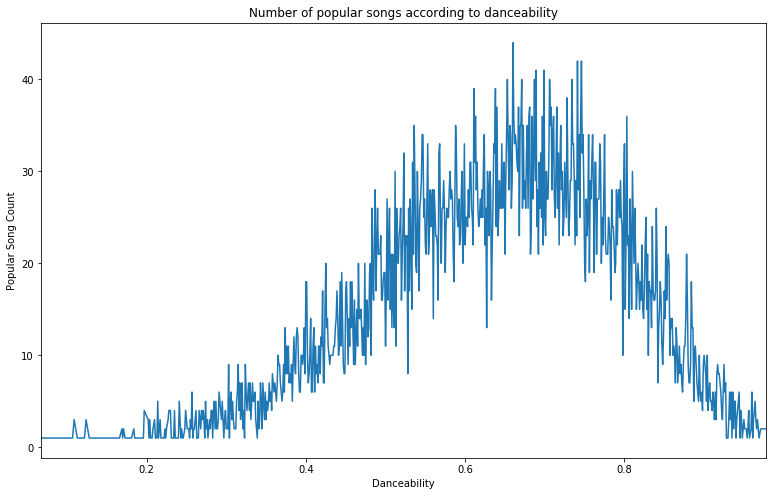

In [28]:
plt.subplots(figsize=(13,8))
popular_songs.groupby('danceability')['popularity'].count().plot()

plt.title('Number of popular songs according to danceability')
plt.xlabel('Danceability')
plt.ylabel('Popular Song Count')
plt.show()

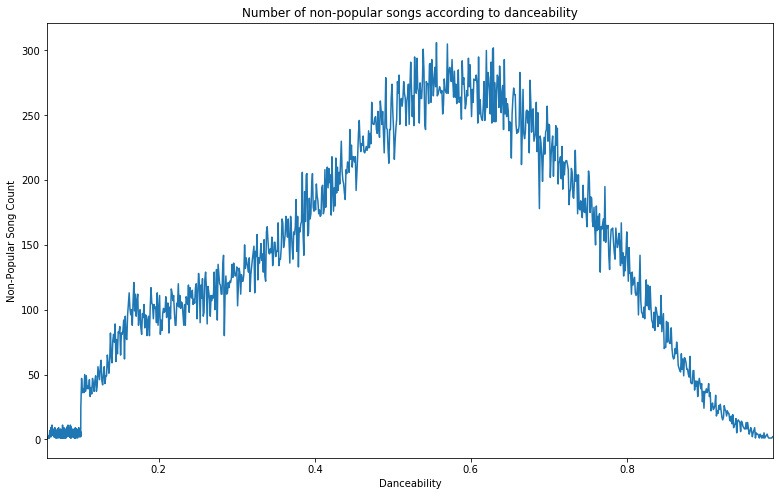

In [29]:
plt.subplots(figsize=(13,8))
not_popular_songs.groupby('danceability')['popularity'].count().plot()

plt.title('Number of non-popular songs according to danceability')
plt.xlabel('Danceability')
plt.ylabel('Non-Popular Song Count')
plt.show()

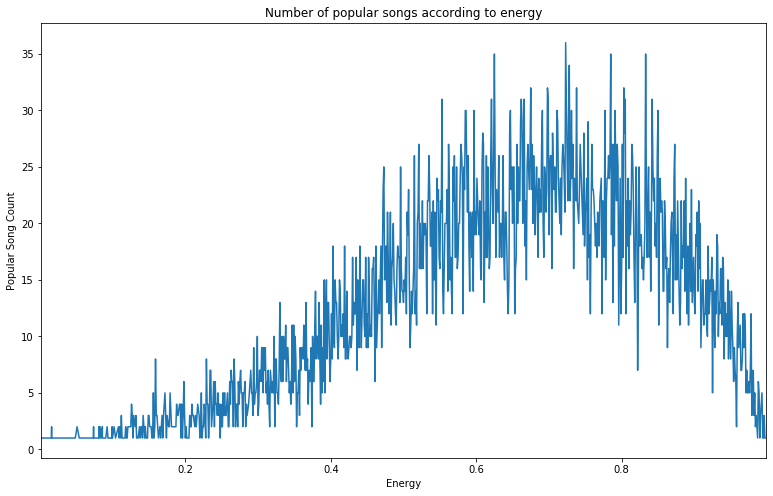

In [30]:
plt.subplots(figsize=(13,8))
popular_songs.groupby('energy')['popularity'].count().plot()

plt.title('Number of popular songs according to energy')
plt.xlabel('Energy')
plt.ylabel('Popular Song Count')
plt.show()

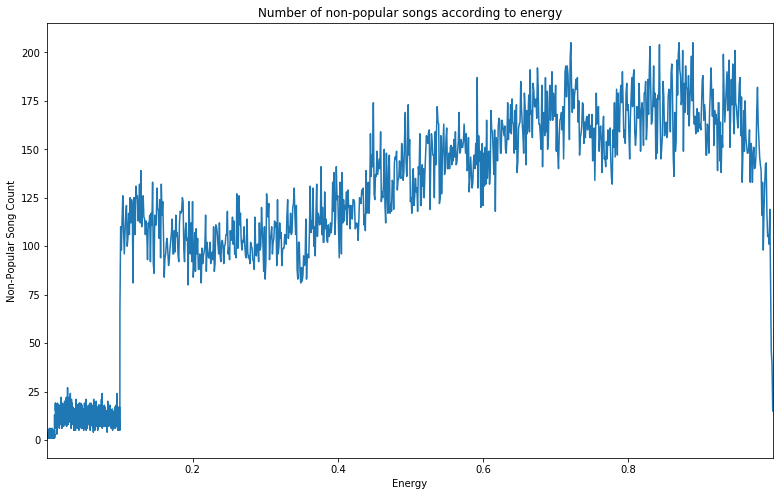

In [31]:
plt.subplots(figsize=(13,8))
not_popular_songs.groupby('energy')['popularity'].count().plot()

plt.title('Number of non-popular songs according to energy')
plt.xlabel('Energy')
plt.ylabel('Non-Popular Song Count')
plt.show()

We see here that each time, we cleary see a region with most popular songs for the different characteristics. But in the same time, the non-popular songs are also in numbers in the same regions. So what we can say is that, your song will have a better chance to be popular if your energy, loudness and danceability are in these specific regions, but this is not guaranteed.

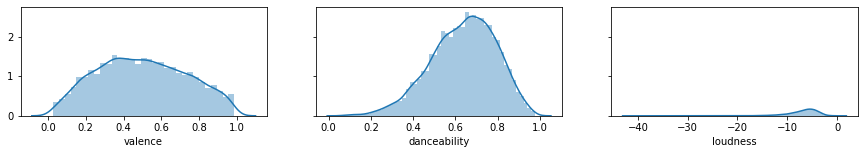

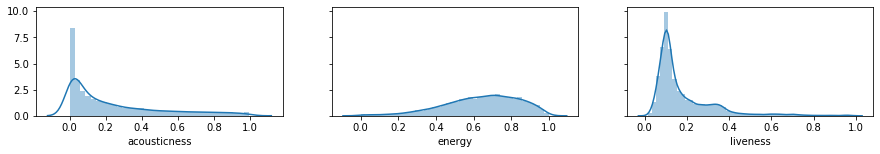

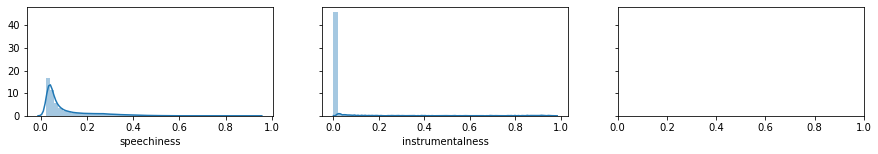

In [32]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 2))


sns.distplot(popular_songs['valence'], ax=axes[0])
sns.distplot(popular_songs['danceability'], ax=axes[1])
sns.distplot(popular_songs['loudness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 2))
sns.distplot(popular_songs['acousticness'], ax=axes[0])
sns.distplot(popular_songs['energy'], ax=axes[1])
sns.distplot(popular_songs['liveness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 2))
sns.distplot(popular_songs['speechiness'], ax=axes[0])
sns.distplot(popular_songs['instrumentalness'], ax=axes[1])

plt.show()

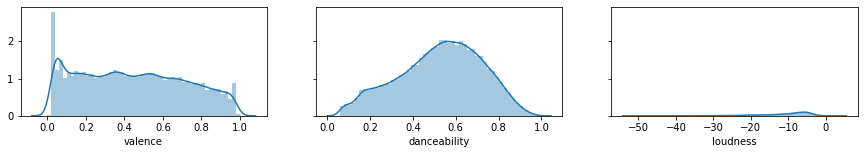

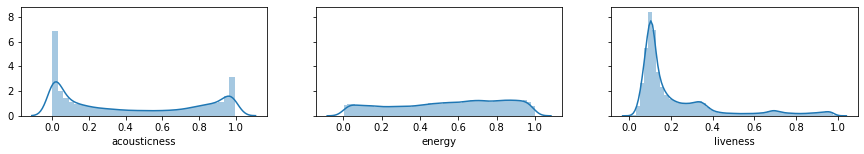

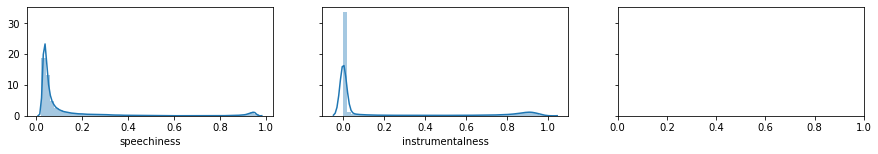

In [33]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 2))


sns.distplot(not_popular_songs['valence'], ax=axes[0])
sns.distplot(not_popular_songs['danceability'], ax=axes[1])
sns.distplot(not_popular_songs['loudness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 2))
sns.distplot(not_popular_songs['acousticness'], ax=axes[0])
sns.distplot(not_popular_songs['energy'], ax=axes[1])
sns.distplot(not_popular_songs['liveness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 2))
sns.distplot(not_popular_songs['speechiness'], ax=axes[0])
sns.distplot(not_popular_songs['instrumentalness'], ax=axes[1])

plt.show()

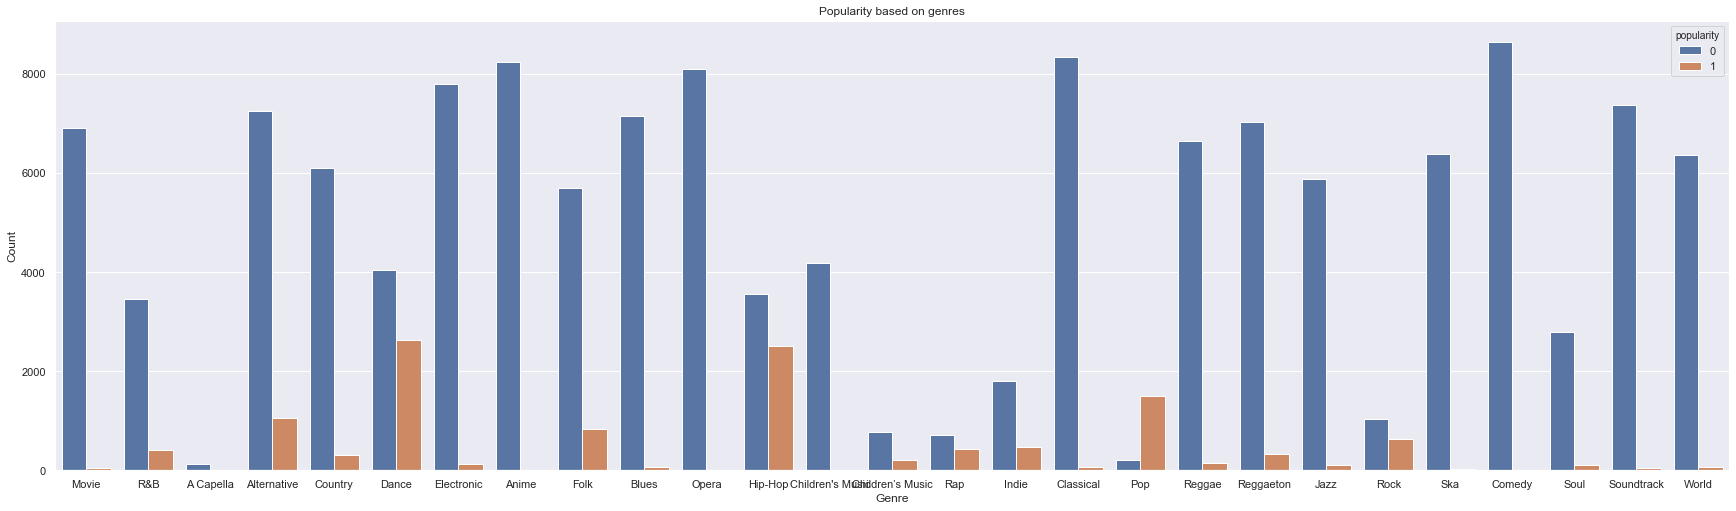

In [34]:
sns.set(rc={'figure.figsize':(30,8.27)})

sns.countplot('genre',hue='popularity', data = df2)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Popularity based on genres')
plt.show()

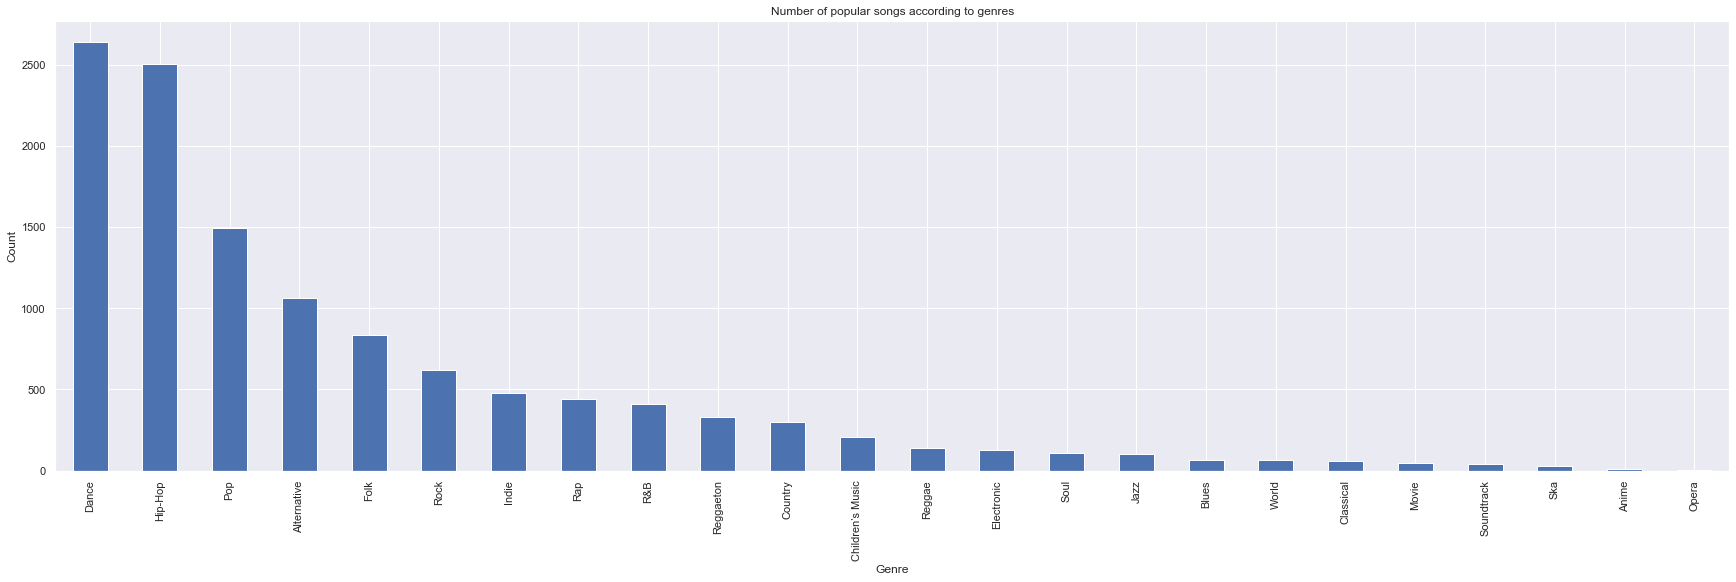

In [35]:
popular_songs.groupby(['genre']).size().sort_values(ascending=False).plot(kind = 'bar')

plt.title('Number of popular songs according to genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

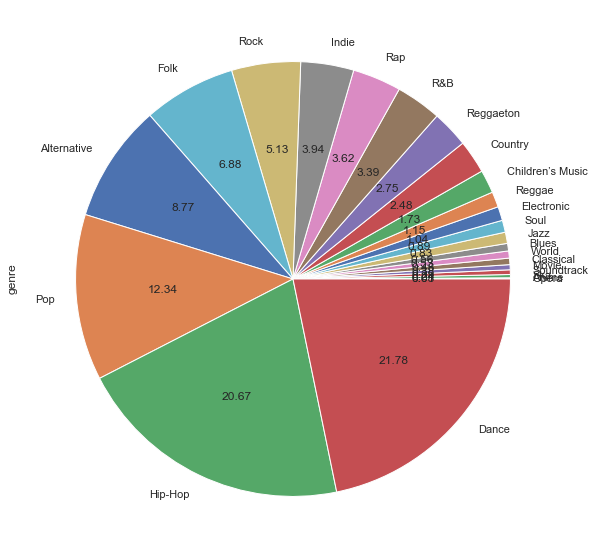

In [38]:
genre_pie = popular_songs['genre'].value_counts().sort_values(ascending=True)

genre_pie.plot.pie(figsize=(10, 10),autopct='%.2f')

Comparing genres to each other, wee see that 3 genres stand out for having lots of popular songs. These 3 genres are Dance, Hip-Hop and Pop. So your song may have a better chance to be popular if it's in one of these three genres. For example, do not expect a lot of popularity if you do Opera songs.

In [39]:
popular_songs.groupby(['artist_name','genre']).size().sort_values(ascending=False).head(15)

artist_name          genre    
Drake                Hip-Hop      102
The Beatles          Rock          76
Eminem               Hip-Hop       61
Ariana Grande        Dance         55
BTS                  Pop           52
Future               Hip-Hop       52
$uicideBoy$          Hip-Hop       47
Logic                Hip-Hop       41
J. Cole              Hip-Hop       40
Mac Miller           Hip-Hop       39
Panic! At The Disco  Pop           39
Queen                Rock          38
Kendrick Lamar       Hip-Hop       38
Ozuna                Reggaeton     37
Shawn Mendes         Dance         36
dtype: int64

When we see the artists with the most number of popular songs, we see that the genres associated are mostly Dance, Hip-Hop and Pop like we said.

# Machine Learning

We do some hot-one encoding in order to have only numerical values

In [40]:
list_keys = df2['key'].unique()
for i in range(len(list_keys)):
    df2.loc[df2['key'] == list_keys[i], 'key'] = i
df2.sample(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
15508,Dance,Zedd,Get Low (with Liam Payne),1,0.027,0.718,204583,0.926,0.000018,0,0.0513,-3.511,Major,0.0494,108.018,4/4,0.540
73925,Children's Music,Kimbo Children's Music,In My Brand New Bathing Suit,0,0.738,0.710,184733,0.183,0.002190,3,0.0737,-17.601,Major,0.0860,121.236,4/4,0.517
148914,Jazz,Louis Armstrong,Mahogany Hall Stomp (Live) - Take 2,0,0.658,0.628,252627,0.408,0.760000,7,0.8750,-11.079,Major,0.0767,106.674,4/4,0.906
56359,Movie,Lorie,I Love You - Live,0,0.413,0.473,277467,0.801,0.000000,3,0.7120,-5.206,Major,0.0296,83.000,4/4,0.382
70539,Hip-Hop,ScHoolboy Q,Tookie Knows II,0,0.264,0.852,285347,0.486,0.000000,8,0.1450,-7.823,Major,0.1890,115.013,4/4,0.138


In [41]:
list_time_signatures = df2['time_signature'].unique()
for i in range(len(list_time_signatures)):
    df2.loc[df2['time_signature'] == list_time_signatures[i], 'time_signature'] = i
df2.sample(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
138009,Reggae,Black Guayaba,Siempre (feat. Jarabedepalo),0,0.00129,0.608,209365,0.883,0.000000,2,0.0648,-3.961,Major,0.0342,120.991,0,0.6800
90432,Hip-Hop,Denzel Curry,Delusional Shone,0,0.00575,0.729,215842,0.622,0.000010,5,0.1290,-7.441,Minor,0.0324,120.001,0,0.4230
203541,Soundtrack,Jesper Kyd,Approaching Target 1,0,0.03040,0.117,215723,0.104,0.568000,2,0.0817,-22.699,Minor,0.0329,81.202,2,0.0299
8132,Country,Miranda Lambert,Desperation,0,0.22600,0.504,211293,0.589,0.000014,2,0.1200,-7.175,Major,0.0328,89.718,2,0.3940
139438,Reggaeton,Jon Z,I Like Her,0,0.25900,0.864,158067,0.781,0.000099,3,0.0813,-1.239,Minor,0.1180,104.035,0,0.6040


In [42]:
df2.loc[df2["mode"] == 'Major', "mode"] = 1
df2.loc[df2["mode"] == 'Minor', "mode"] = 0
df2.sample(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
217720,World,ICF Worship,Schwerelos,0,0.0972,0.593,221693,0.691,0.0000,4,0.5830,-6.774,1,0.0281,103.014,0,0.7780
35115,Anime,Bruce Faulconer,Goku And Shenron,0,0.2010,0.236,119440,0.175,0.8750,4,0.2400,-15.680,1,0.0404,119.521,2,0.0292
211453,Comedy,Sinbad,Half Naked Women Don't Affect You,0,0.8290,0.449,170853,0.609,0.0000,11,0.4960,-15.414,0,0.9030,73.824,2,0.0884
197227,Soul,Ann Peebles,"Run, Run, Run",0,0.2410,0.757,158267,0.343,0.0981,3,0.0638,-13.691,0,0.0540,160.294,0,0.6940
199447,Soundtrack,Lorne Balfe,Stairs and Rooftops,0,0.2900,0.486,360400,0.617,0.8850,0,0.1180,-13.988,1,0.1040,154.976,0,0.1370


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [44]:
ft = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "mode", "speechiness", "tempo", "time_signature", "valence"]

We will now separate the dataframe. We'll take 80% of it for training, and 20% for testing

In [45]:
training = df2.sample(frac = 0.8,random_state = 0)
X_train = training[ft]
y_train = training['popularity']
X_test = df2.drop(training.index)[ft]

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# Random Forest

We want to do classification with Random Forest algorithm, in order to predict if a song will be popular ot not

In [48]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)




C:\Users\brend\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(" Confusion matrix :")
print()
print(confusion_matrix(y_valid, RFC_Predict))
print()
print(" Classification report :")
print()
print(classification_report(y_valid, RFC_Predict))
print("Accuracy : ", accuracy_score(y_valid, RFC_Predict))

 Confusion matrix :

[[21834    88]
 [ 1824    33]]

 Classification report :

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     21922
           1       0.27      0.02      0.03      1857

    accuracy                           0.92     23779
   macro avg       0.60      0.51      0.50     23779
weighted avg       0.87      0.92      0.89     23779

Accuracy :  0.9195929181210312


We have an accuracy of 0.91 which is very good. But checking on precision, only 27% of 1 is correctly predicted

# Decision Tree

We want to do classification with Desicion Tree algorithm, in order to predict if a song will be popular ot not

In [50]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)


In [51]:
print(" Confusion matrix :")
print()
print(confusion_matrix(y_valid, DT_Predict))
print()
print(" Classification report :")
print()
print(classification_report(y_valid, DT_Predict))
print("Accuracy : ", accuracy_score(y_valid, DT_Predict))

 Confusion matrix :

[[20062  1860]
 [ 1537   320]]

 Classification report :

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     21922
           1       0.15      0.17      0.16      1857

    accuracy                           0.86     23779
   macro avg       0.54      0.54      0.54     23779
weighted avg       0.87      0.86      0.86     23779

Accuracy :  0.8571428571428571


We have an accuracy of 0.85 which is very good but less the one frome Random tree classification. But checking on precision, only 15% of 1 is correctly predicted

# Linear Regression

We are going here to try to predict the popularity of a song using the linear regression algorithm

In [52]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [53]:
list_keys2 = df['key'].unique()
for i in range(len(list_keys2)):
    df.loc[df['key'] == list_keys2[i], 'key'] = i
df.sample(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
166162,Rock,Jake Owen,Down To The Honkytonk,76,0.162,0.623,183140,0.828,0.000000,6,0.0976,-4.272,Major,0.0565,82.059,4/4,0.953
79778,Opera,Georges Bizet,"Carmen, Act 1: ""Près des remparts de Séville"" ...",20,0.955,0.376,126627,0.369,0.000000,8,0.1560,-10.999,Major,0.0763,158.815,3/4,0.362
154053,Rock,Led Zeppelin,You Shook Me - 1993 Remaster,53,0.662,0.367,388093,0.481,0.023700,11,0.1370,-12.915,Minor,0.0626,155.960,3/4,0.383
42172,Folk,Kishi Bashi,This Must Be the Place (Naive Melody) [by Talk...,59,0.794,0.729,206896,0.267,0.000114,5,0.2090,-8.630,Minor,0.0311,119.985,4/4,0.750
158317,Reggaeton,Joey Montana,La Movida,58,0.223,0.722,194040,0.907,0.000000,4,0.6340,-3.730,Major,0.0538,94.001,4/4,0.740


In [54]:
list_time_signatures2 = df['time_signature'].unique()
for i in range(len(list_time_signatures2)):
    df.loc[df['time_signature'] == list_time_signatures2[i], 'time_signature'] = i
df.sample(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135808,Reggae,Movimiento Original,Mov Rap and Reggae,51,0.0472,0.671,231706,0.882,0.000000,9,0.2690,-4.236,Minor,0.2130,86.971,0,0.916
179034,Jazz,Tape Five,Bad Boy Good Man (Feat. Henrik Wager) - Aeroph...,39,0.5020,0.829,255109,0.879,0.004830,9,0.1420,-5.620,Major,0.0543,127.047,0,0.922
81933,Opera,Gaetano Donizetti,"L'elisir d'amore / Act 2: ""La donna è un animale""",6,0.9460,0.354,321933,0.124,0.000003,0,0.5770,-22.962,Major,0.1040,77.673,0,0.364
129541,Classical,Pyotr Ilyich Tchaikovsky,"Symphony No. 4 in F Minor, Op. 36: I. Andante ...",28,0.9220,0.271,1142280,0.085,0.866000,3,0.0867,-18.675,Minor,0.0397,111.755,0,0.099
12145,Alternative,Earl Sweatshirt,Centurion,45,0.0655,0.348,183960,0.796,0.000000,4,0.2790,-8.266,Major,0.4850,166.224,0,0.573


In [55]:
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
df.sample(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
126246,Classical,Jean-Yves Thibaudet,"Suite bergamasque, L.75: 3. Clair de lune",33,0.99500,0.403,292240,0.00713,0.921000,0,0.0734,-32.005,1,0.0457,66.657,0,0.0388
66578,Folk,Simon & Garfunkel,The 59th Street Bridge Song (Feelin' Groovy) -...,42,0.89300,0.549,115947,0.27300,0.000739,2,0.6760,-17.818,1,0.0499,65.319,0,0.6690
130433,Classical,Johann Sebastian Bach,"Herz und Mund und Tat und Leben, BWV 147: X. J...",0,0.99000,0.247,254627,0.27700,0.737000,4,0.5460,-25.637,1,0.0568,70.978,0,0.7080
12380,Alternative,Duckwrth,UNSTATUS QUO,44,0.00968,0.767,177840,0.77600,0.000006,8,0.0712,-5.980,1,0.0839,112.989,0,0.5230
55827,Movie,Dorothée,Le sorcier du quartier,1,0.31600,0.785,266160,0.74100,0.000000,1,0.3220,-7.923,0,0.0275,115.103,0,0.9510


In [56]:
training2 = df.sample(frac = 0.8,random_state = 0)
X_train2 = training2[ft]
y_train2 = training2['popularity']
X_test = df.drop(training2.index)[ft]

In [57]:
X_train2, X_test, y_train2, y_test = train_test_split(X_train2, y_train2, test_size = 0.2, random_state = 0)

In [58]:
Lin_R = LinearRegression()
Lin_R.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
Lin_R_pred = Lin_R.predict(X_test)

In [60]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Lin_R_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Lin_R_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Lin_R_pred)))

Mean Absolute Error: 12.371253052234765
Mean Squared Error: 239.53786047357858
Root Mean Squared Error: 15.477010708582538


In [61]:
y_test.shape

(23779,)

In [62]:
y_test = y_test.values.reshape(1,23779)

In [63]:
df_lin_r = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Lin_R_pred.flatten()})
df_lin_r.head(20)

,Actual,Predicted
0,36,31.013543
1,44,41.942702
2,50,43.565541
3,32,20.269511
4,56,37.876585
5,2,33.264145
6,9,24.603085
7,69,35.899743
8,20,49.079194
9,54,44.070837


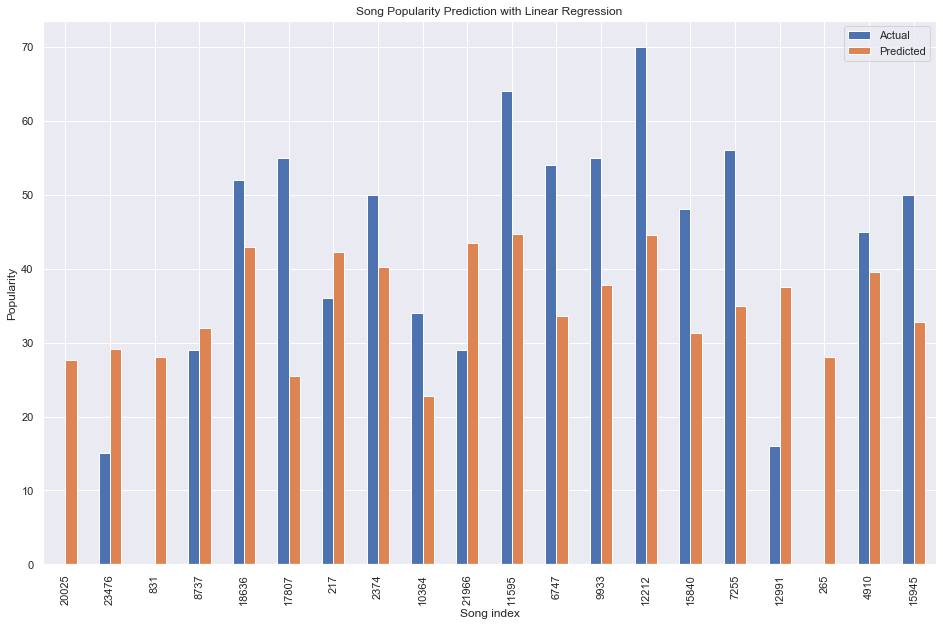

In [64]:
df_lin_r = df_lin_r.sample(20, replace=True)
df_lin_r.plot(kind='bar',figsize=(16,10))

plt.title('Song Popularity Prediction with Linear Regression')
plt.xlabel('Song index')
plt.ylabel('Popularity')

plt.show()

We observe a Root Mean Square Error of 15,5. This means that our prediction will not be perfect, but that is good

# Conclusion

We see here that the predictions are not extraordinary but they are ok.
So we saw here if we could predict the popularity of a song based on different features.
What we can conclude, is that even if we can predict approximatively the popularity of a song, there are still lots of features to take in account, like the marketing, artist renown etc... For example, the same song released by us or Drake will not have the same impact in the music industry